# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer Vision is the practice of writing algorithms that can discover patterns in visual data. Such as the camera of a self-driving car.

[CNN Explainer Website](https://poloclub.github.io/cnn-explainer/) - Great resource.

## Get the data

The images comes from Kaggle Food-101: https://www.kaggle.com/datasets/dansbecker/food-101

The data in this notebook is from Daniel Bourke's modified version: https://github.com/mrdbourke/tensorflow-deep-learning

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
    
# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-01-07 12:42:22--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.116.128, 142.250.115.128, 142.251.35.208, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.116.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M  89.0MB/s    in 1.2s    

2023-01-07 12:42:24 (89.0 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



## Inspect the data (become one with the data)

A very crucial step at the beginning of any machine learning project is become one with the data.

If it's computer vision, this usually means analysing the samples.

In [2]:
!ls ../data/pizza_steak

test  train


In [3]:
import os

# walk through pizza_steak directory to count files
for dirpath, dirnames, filenames in os.walk('../data/pizza_steak'):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 2 directories and 0 images in '../data/pizza_steak'
There are 2 directories and 0 images in '../data/pizza_steak/test'
There are 0 directories and 250 images in '../data/pizza_steak/test/steak'
There are 0 directories and 250 images in '../data/pizza_steak/test/pizza'
There are 2 directories and 0 images in '../data/pizza_steak/train'
There are 0 directories and 750 images in '../data/pizza_steak/train/steak'
There are 0 directories and 750 images in '../data/pizza_steak/train/pizza'


In [4]:
# Another way to find out how images are in a file
num_steak_images_train = len(os.listdir("../data/pizza_steak/train/steak"))
num_steak_images_train

750

To visualize our images, first let's get the class names programmatically...

In [5]:
# Get class names programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("../data/pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Create a list of classnames from the subdirectories in training folder directories
print(class_names)

['pizza' 'steak']


In [6]:
# visualize images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    # Set up the target dir
    target_folder = target_dir + target_class
    
    # Get random image
    random_image = random.sample(os.listdir(target_folder), 1)
    print(random_image)
    
    # Read in the image and plot it
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")
    
    print(f"Image shape: {img.shape}") # show shape of the image
    
    return img

['1584379.jpg']
Image shape: (512, 512, 3)


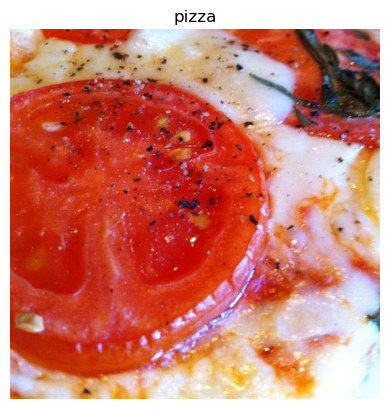

In [7]:
# View random image from training dataset
img = view_random_image(target_dir="../data/pizza_steak/train/",
                       target_class="pizza")

In [8]:
import tensorflow as tf
# convert image array to tensor
tf.constant(img)

2023-01-07 12:42:25.703866: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-07 12:42:27.675280: I tensorflow/c/logging.cc:34] Successfully opened dynamic library libdirectml.d6f03b303ac3c4f2eeb8ca631688c9757b361310.so
2023-01-07 12:42:27.675333: I tensorflow/c/logging.cc:34] Successfully opened dynamic library libdxcore.so
2023-01-07 12:42:27.677313: I tensorflow/c/logging.cc:34] Successfully opened dynamic library libd3d12.so
2023-01-07 12:42:27.948327: I tensorflow/c/logging.cc:34] DirectML device enumeration: found 1 compatible adapters.
2023-01-07 12:42:28.542749: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the fo

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[213, 228, 233],
        [217, 232, 239],
        [216, 234, 246],
        ...,
        [187, 152, 132],
        [193, 157, 133],
        [197, 161, 135]],

       [[212, 223, 229],
        [217, 230, 238],
        [221, 235, 246],
        ...,
        [188, 155, 140],
        [189, 156, 139],
        [191, 156, 137]],

       [[207, 211, 220],
        [215, 222, 232],
        [224, 232, 245],
        ...,
        [193, 164, 160],
        [191, 160, 155],
        [188, 158, 150]],

       ...,

       [[211, 120,  50],
        [208, 115,  46],
        [205, 108,  37],
        ...,
        [245, 254, 253],
        [245, 254, 253],
        [245, 254, 253]],

       [[223, 133,  55],
        [215, 123,  46],
        [208, 112,  35],
        ...,
        [245, 254, 253],
        [246, 255, 254],
        [246, 255, 254]],

       [[238, 149,  67],
        [225, 134,  53],
        [210, 118,  35],
        ...,
        [245, 254, 25

In [9]:
img.shape

(512, 512, 3)

In [10]:
# Make all pixel values between 0 and 1
img/255.

array([[[0.83529412, 0.89411765, 0.91372549],
        [0.85098039, 0.90980392, 0.9372549 ],
        [0.84705882, 0.91764706, 0.96470588],
        ...,
        [0.73333333, 0.59607843, 0.51764706],
        [0.75686275, 0.61568627, 0.52156863],
        [0.77254902, 0.63137255, 0.52941176]],

       [[0.83137255, 0.8745098 , 0.89803922],
        [0.85098039, 0.90196078, 0.93333333],
        [0.86666667, 0.92156863, 0.96470588],
        ...,
        [0.7372549 , 0.60784314, 0.54901961],
        [0.74117647, 0.61176471, 0.54509804],
        [0.74901961, 0.61176471, 0.5372549 ]],

       [[0.81176471, 0.82745098, 0.8627451 ],
        [0.84313725, 0.87058824, 0.90980392],
        [0.87843137, 0.90980392, 0.96078431],
        ...,
        [0.75686275, 0.64313725, 0.62745098],
        [0.74901961, 0.62745098, 0.60784314],
        [0.7372549 , 0.61960784, 0.58823529]],

       ...,

       [[0.82745098, 0.47058824, 0.19607843],
        [0.81568627, 0.45098039, 0.18039216],
        [0.80392157, 0

## An end-to-end example

Let's build a convolutional neural network to find patterns in our images.

* Load our images
* Preprocess our images
* Build a CNN to find patterns
* Compile CNN
* Fit CNN to training data

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set seed
tf.random.set_seed(42)

# Preprocess data - need to normalize picture tensors
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to data directories
train_dir = "../data/pizza_steak/train"
test_dir = "../data/pizza_steak/test"

# Import data from directories and convert to batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                              batch_size=32,
                                              target_size=(224, 224),
                                              class_mode="binary",
                                              seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                              batch_size=32,
                                              target_size=(224, 224),
                                              class_mode="binary",
                                              seed=42)

# Build a CNN Model (Tiny VGG, CNN Explainer Website)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                          kernel_size=3,
                          activation="relu",
                          input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                             padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

# fit the model
history_1 = model_1.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=valid_data,
                       validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5


2023-01-07 12:42:30.157605: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-07 12:42:30.235851: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-07 12:42:30.235895: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 83006 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


47/47 [==============================] - ETA: 0s - loss: 0.5827 - accuracy: 0.6747

2023-01-07 12:42:38.255864: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-07 12:42:38.283158: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-07 12:42:38.283204: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 83006 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


47/47 [==============================] - 10s 135ms/step - loss: 0.5827 - accuracy: 0.6747 - val_loss: 0.4635 - val_accuracy: 0.7740
Epoch 2/5
47/47 [==============================] - 5s 115ms/step - loss: 0.4402 - accuracy: 0.7980 - val_loss: 0.3625 - val_accuracy: 0.8580
Epoch 3/5
47/47 [==============================] - 5s 115ms/step - loss: 0.4236 - accuracy: 0.8187 - val_loss: 0.3611 - val_accuracy: 0.8700
Epoch 4/5
47/47 [==============================] - 5s 114ms/step - loss: 0.3741 - accuracy: 0.8387 - val_loss: 0.3578 - val_accuracy: 0.8580
Epoch 5/5
47/47 [==============================] - 5s 115ms/step - loss: 0.3279 - accuracy: 0.8640 - val_loss: 0.3288 - val_accuracy: 0.8660


In [12]:
# Get model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Using the same model as before (classification model)

Using model built before in previous classification model to see how well it works on images.


In [13]:
# set seed
tf.random.set_seed(42)

# create model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

# fit the model
history_2 = model_2.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Epoch 1/5


2023-01-07 12:43:01.982130: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-07 12:43:02.031830: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-07 12:43:02.031876: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 83006 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


47/47 [==============================] - ETA: 0s - loss: 0.8659 - accuracy: 0.4960

2023-01-07 12:43:07.458307: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-07 12:43:07.479367: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-07 12:43:07.479418: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 83006 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


47/47 [==============================] - 7s 136ms/step - loss: 0.8659 - accuracy: 0.4960 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 5s 116ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 5s 114ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 5s 114ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 5s 117ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [14]:
# set seed
tf.random.set_seed(42)

# create model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# compile model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

# fit
history_3 = model_3.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=valid_data,
                       validation_steps=len(valid_data))

Epoch 1/5


2023-01-07 12:43:31.249361: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-07 12:43:31.305323: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-07 12:43:31.305371: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 83006 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)
2023-01-07 12:43:31.306670: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-07 12:43:31.306717: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_f

47/47 [==============================] - ETA: 0s - loss: 2.4748 - accuracy: 0.6313

2023-01-07 12:43:36.790078: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-07 12:43:36.813051: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-07 12:43:36.813103: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 83006 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)
2023-01-07 12:43:36.813953: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-07 12:43:36.813987: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_f

47/47 [==============================] - 7s 130ms/step - loss: 2.4748 - accuracy: 0.6313 - val_loss: 1.0202 - val_accuracy: 0.6660
Epoch 2/5
47/47 [==============================] - 5s 116ms/step - loss: 1.1244 - accuracy: 0.6727 - val_loss: 0.5159 - val_accuracy: 0.7420
Epoch 3/5
47/47 [==============================] - 5s 115ms/step - loss: 0.6205 - accuracy: 0.7440 - val_loss: 0.4542 - val_accuracy: 0.8020
Epoch 4/5
47/47 [==============================] - 5s 115ms/step - loss: 0.6316 - accuracy: 0.7193 - val_loss: 0.7602 - val_accuracy: 0.6960
Epoch 5/5
47/47 [==============================] - 5s 115ms/step - loss: 0.4654 - accuracy: 0.7967 - val_loss: 0.4626 - val_accuracy: 0.7920


In [15]:
# get model_3 summary
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, None)              0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


## Binary Classification: Break it down

1. Become one with the data through exploration
2. Preprocess the data through scaling/normalization
3. Created a model (start with a baseline; beat the paper we looked at)
4. Fit the model
5. Evaluate the model
6. Hyperparameter tuning to beat your original model
7. Repeat until satisfied

### 1. Become one with the data.

['3223400.jpg']
Image shape: (512, 512, 3)
['166823.jpg']
Image shape: (512, 384, 3)


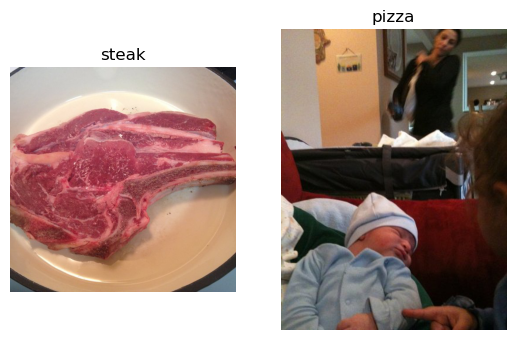

In [16]:
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("../data/pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("../data/pizza_steak/train/", "pizza")

### Preprocess the data (prepare it for a model)

In [17]:
# Define our directory dataset paths
train_dir = "../data/pizza_steak/train/"
test_dir= "../data/pizza_steak/test/"

Now we need to turn our data into **batches...**

In [18]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [19]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, # target dir of images
                                              target_size=(224,224), # target size of images (height, width)
                                              class_mode="binary", # binary, one class or the other
                                              batch_size=32) # size of minibatches, Yann Lecun says 32

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                            target_size=(224,224),
                                            class_mode="binary",
                                            batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [20]:
# Get a sample of a training data batch
images, labels= train_data.next() # get the next batch
len(images), len(labels)

(32, 32)

In [21]:
# How many batches are there
len(train_data) # 47 = 1500 (total images) / 32 (batch size)

47

In [22]:
# get first 2 images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [23]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### 3. Create a CNN Model (create a baseline)

A baseline is a relatively simple model or existing result that you set up at the beginning of a machine learning experiement.
The goal is to beat the baseline.

> **NOTE:** In deep learning, there are an infinite amount of architectures you could use. Use the commonly used in the field, make it small, build out from there.

In [24]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy, SparseCategoricalCrossentropy, CategoricalCrossentropy
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [25]:
# Create the model (baseline model, 3 layer convolutional neural network)
model_4 = Sequential([
    Conv2D(filters=10,
          kernel_size=3,
          strides=1,
          padding="valid", # if same, output shape same as input shape, valid shape gets compressed
          activation="relu",
          input_shape=(224,224,3)), # input shape
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid") # output layer, 1 neuron due to binary classification, sigmoid for binary/softmax for multi
])

In [26]:
# compile the model
model_4.compile(loss=BinaryCrossentropy(),
                optimizer=Adam(),
                metrics=["accuracy"]
               )

## 4. Fit the model


In [27]:
# check the lengths of the training and test data generators
len(train_data) , len(test_data)

(47, 16)

In [28]:
# fit the model
history_4 = model_4.fit(train_data, # this is a combination of labels and sample data from the generator
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5


2023-01-07 12:44:00.691809: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-07 12:44:00.755689: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-07 12:44:00.755737: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 83006 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


47/47 [==============================] - ETA: 0s - loss: 0.5546 - accuracy: 0.7380

2023-01-07 12:44:05.258423: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-07 12:44:05.282928: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-07 12:44:05.282976: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 83006 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


47/47 [==============================] - 6s 120ms/step - loss: 0.5546 - accuracy: 0.7380 - val_loss: 0.4454 - val_accuracy: 0.7780
Epoch 2/5
47/47 [==============================] - 5s 115ms/step - loss: 0.4089 - accuracy: 0.8187 - val_loss: 0.5046 - val_accuracy: 0.7480
Epoch 3/5
47/47 [==============================] - 5s 114ms/step - loss: 0.2366 - accuracy: 0.9127 - val_loss: 0.3762 - val_accuracy: 0.8320
Epoch 4/5
47/47 [==============================] - 5s 116ms/step - loss: 0.1132 - accuracy: 0.9620 - val_loss: 0.4358 - val_accuracy: 0.8040
Epoch 5/5
47/47 [==============================] - 5s 113ms/step - loss: 0.0447 - accuracy: 0.9933 - val_loss: 0.4839 - val_accuracy: 0.8220


### 5. Evaluating our model

<AxesSubplot: >

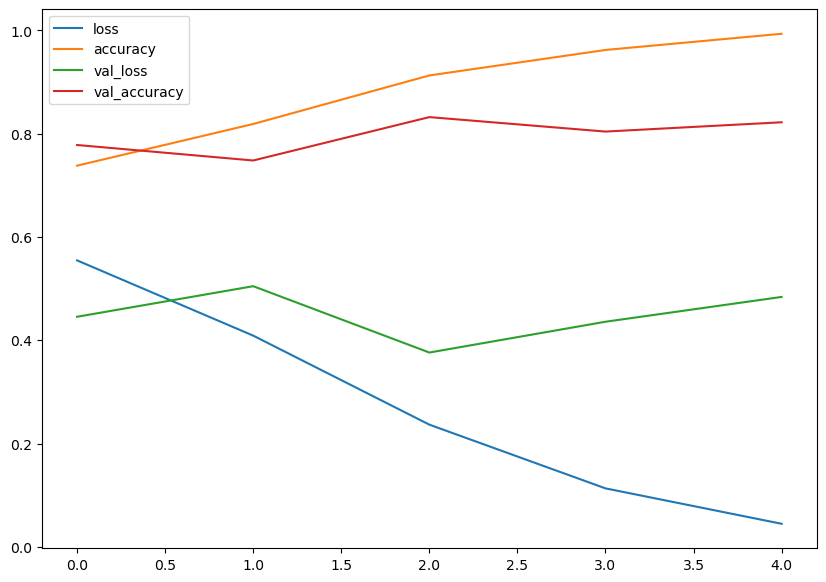

In [29]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [30]:
# Plot validation and training curves separately
def plot_loss_curves(history):
    """
    Returns separate loss curves for training and validation data sets
    """
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    
    epochs = range(len(history.history["loss"])) # how many epochs occured
    
    # plot loss
    plt.plot(epochs, loss, label="training_loss")
    plt.plot(epochs, val_loss, label="val_loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()
    
    # plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label="training_accuracy")
    plt.plot(epochs, val_accuracy, label="val_accuracy")
    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend()

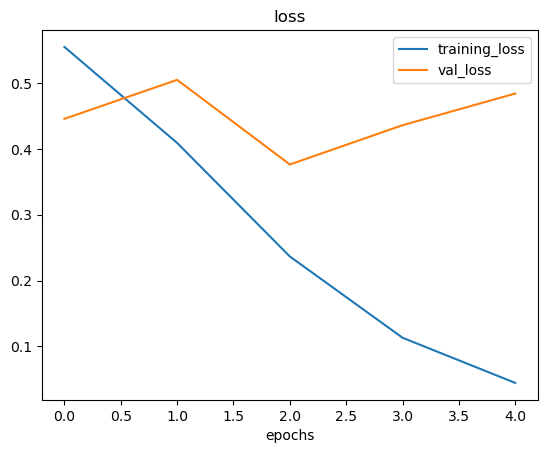

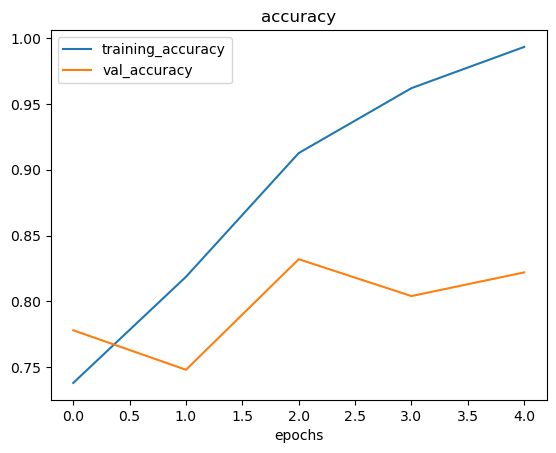

In [31]:
# check out loss and accuracy of model 4
plot_loss_curves(history_4)

> **NOTE:** When the model's validation loss starts to increase, it is likely that the model is **OVERFITTING** the training dataset. It's learning the patterns in the training dataset too well, it cannot generalize.

### 6. Adjust model parameters

Fitting machine learning model into 3 general steps:
0. Create baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:
* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of the our flattened layer

Ways to reduce overfitting:
* Add data augmentation
* Add regularlization layers (such as MaxPool2D) - **regularization is the reduction of overfitting**
* Add more data...

In [32]:
# Create the model (new baseline)

model_5 = Sequential([
    Conv2D(10,3,activation="relu", input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [33]:
# compile the model
model_5.compile(loss=BinaryCrossentropy(),
               optimizer=Adam(),
               metrics=["accuracy"])

In [34]:
# Fit the model
history_5 = model_5.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=valid_data,
                       validation_steps=len(valid_data))

Epoch 1/5
 1/47 [..............................] - ETA: 18s - loss: 0.7211 - accuracy: 0.5000

2023-01-07 12:44:29.189155: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-07 12:44:29.254886: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-07 12:44:29.254932: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 83006 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


47/47 [==============================] - ETA: 0s - loss: 0.6386 - accuracy: 0.6300

2023-01-07 12:44:33.514108: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-07 12:44:33.539770: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-07 12:44:33.539816: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 83006 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


47/47 [==============================] - 6s 124ms/step - loss: 0.6386 - accuracy: 0.6300 - val_loss: 0.5421 - val_accuracy: 0.7060
Epoch 2/5
47/47 [==============================] - 5s 115ms/step - loss: 0.5072 - accuracy: 0.7713 - val_loss: 0.4379 - val_accuracy: 0.8100
Epoch 3/5
47/47 [==============================] - 5s 115ms/step - loss: 0.4410 - accuracy: 0.8100 - val_loss: 0.3840 - val_accuracy: 0.8600
Epoch 4/5
47/47 [==============================] - 5s 116ms/step - loss: 0.4129 - accuracy: 0.8193 - val_loss: 0.3539 - val_accuracy: 0.8720
Epoch 5/5
47/47 [==============================] - 5s 117ms/step - loss: 0.3609 - accuracy: 0.8447 - val_loss: 0.3278 - val_accuracy: 0.8700


In [35]:
# get a summary
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

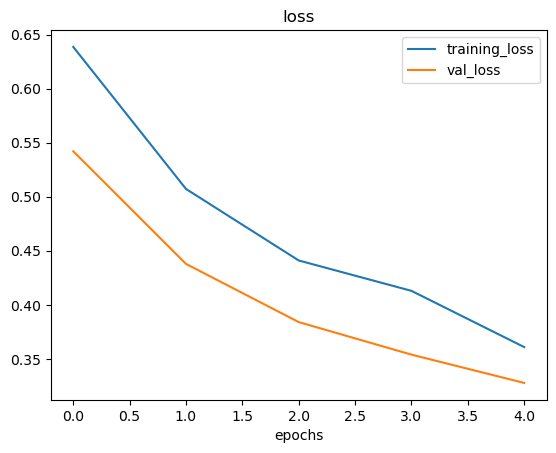

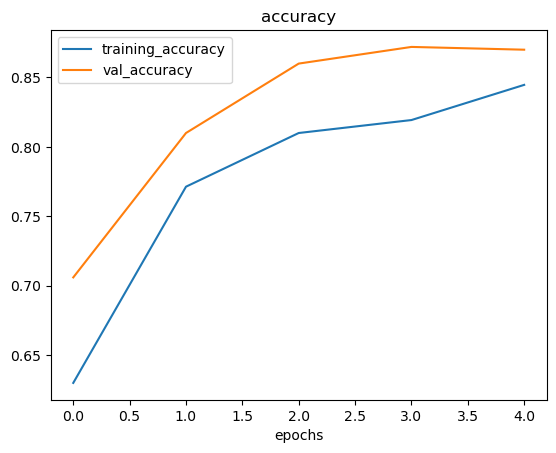

In [36]:
# plot loss curves
plot_loss_curves(history_5)

### Data augmentation

In [37]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1./255,
                                            rotation_range=0.2, # how much do you want to rotate?
                                            shear_range=0.2, # These all happen at random. How much to shear an image?
                                            zoom_range=0.2, # zoom into the image
                                            width_shift_range=0.2, # shifts the object
                                            height_shift_range=0.2, # shifts the objects
                                            horizontal_flip=True) # do you want to flip the image along an axis (reflection)

# create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

> **QUESTION:** What is data augmentation?

Data augmentation is the process of altering our training data, leading it to have more diversity and attempting to provide it with a means to become more generalizeable.

In [38]:
# Import data and augment it from training directory
print("Augmented training data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224,224),
                                                                  batch_size=32,
                                                                  class_mode="binary",
                                                                  shuffle=False) # for demo only

# create non-augmented train data batches
print("Non-augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode="binary",
                                              shuffle=False)

# Create non-augmented test data batches
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode="binary")

Augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


> Data augmentation is usually only performed on the training data. Using `ImageDataGenerator`built-in data augmentation parameters our images are kept the same in source but are modified as they are loaded into the model.

In [39]:
# get some sample augmented data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # labels aren't actually augmented

Showing image numbers: 0


(-0.5, 223.5, 223.5, -0.5)

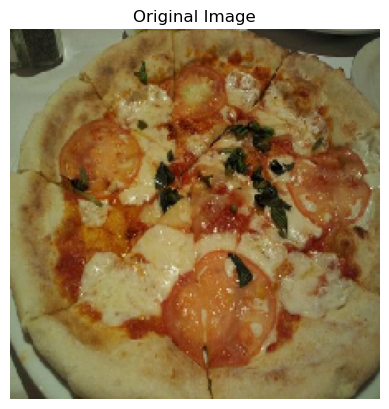

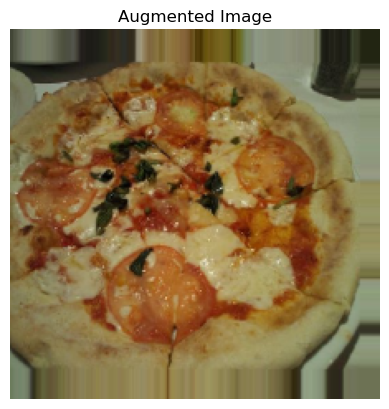

In [40]:
# show original image and augmented image
import random
random_number = random.randint(0, 32) # our batch size is 32
print(f"Showing image numbers: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original Image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title("Augmented Image")
plt.axis(False)

In [41]:
# Create the model with augmented data
model_6 = Sequential([
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_6.compile(loss=BinaryCrossentropy(),
               optimizer=Adam(),
               metrics=["accuracy"])

# fit the model
history_6 = model_6.fit(train_data_augmented, # augmented training data
                       epochs=5,
                       steps_per_epoch=len(train_data_augmented),
                       validation_data=test_data,
                       validation_steps=len(test_data))

Epoch 1/5


2023-01-07 12:44:58.598895: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-07 12:44:58.664763: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-07 12:44:58.664810: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 83006 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)
2023-01-07 12:44:58.665728: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-07 12:44:58.665762: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_f

47/47 [==============================] - ETA: 0s - loss: 0.7011 - accuracy: 0.5320

2023-01-07 12:45:11.034715: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-07 12:45:11.061473: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-07 12:45:11.061517: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 83006 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)
2023-01-07 12:45:11.062398: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-07 12:45:11.062430: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_f

47/47 [==============================] - 14s 292ms/step - loss: 0.7011 - accuracy: 0.5320 - val_loss: 0.7016 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 13s 287ms/step - loss: 0.7242 - accuracy: 0.4273 - val_loss: 0.6911 - val_accuracy: 0.5640
Epoch 3/5
47/47 [==============================] - 13s 286ms/step - loss: 0.6986 - accuracy: 0.5393 - val_loss: 0.6775 - val_accuracy: 0.7280
Epoch 4/5
47/47 [==============================] - 14s 287ms/step - loss: 0.6894 - accuracy: 0.5573 - val_loss: 0.6409 - val_accuracy: 0.5960
Epoch 5/5
47/47 [==============================] - 13s 286ms/step - loss: 0.6748 - accuracy: 0.6040 - val_loss: 0.6274 - val_accuracy: 0.6100


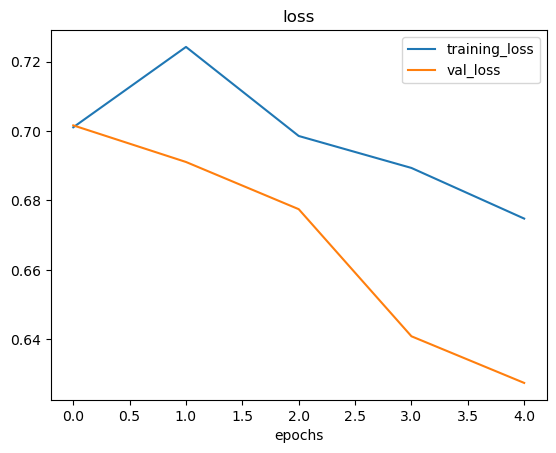

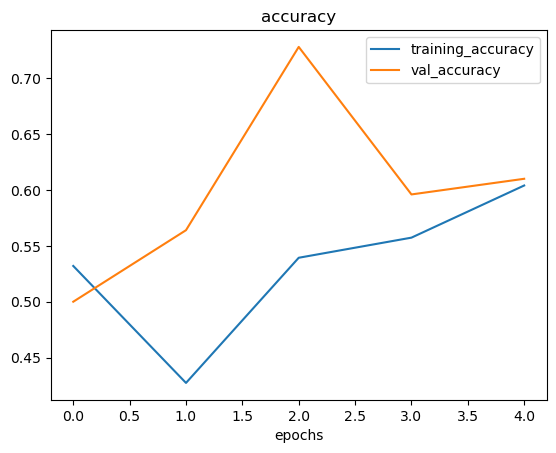

In [42]:
# Check our models training curves
plot_loss_curves(history_6)

In [43]:
# augmented and shuffled training data
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                           target_size=(224,224),
                                                                           class_mode="binary",
                                                                           batch_size=32,
                                                                           shuffle=True) # shuffled data

Found 1500 images belonging to 2 classes.


In [44]:
# create the model, same as 5 and 6
model_7 = Sequential([
    Conv2D(10,3,activation="relu", input_shape=(224, 224,3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# compile the model
model_7.compile(loss=BinaryCrossentropy(),
               optimizer=Adam(),
               metrics=["accuracy"])

# fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # shuffled and augmented
                       epochs=5,
                       steps_per_epoch=len(train_data_augmented_shuffled),
                       validation_data=test_data,
                       validation_steps=len(test_data))

Epoch 1/5


2023-01-07 12:46:07.153489: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-07 12:46:07.219683: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-07 12:46:07.219731: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 83006 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


47/47 [==============================] - ETA: 0s - loss: 0.6820 - accuracy: 0.5367

2023-01-07 12:46:19.490243: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-07 12:46:19.516343: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-07 12:46:19.516388: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 83006 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


47/47 [==============================] - 14s 289ms/step - loss: 0.6820 - accuracy: 0.5367 - val_loss: 0.6256 - val_accuracy: 0.6780
Epoch 2/5
47/47 [==============================] - 14s 287ms/step - loss: 0.5834 - accuracy: 0.6840 - val_loss: 0.4496 - val_accuracy: 0.8140
Epoch 3/5
47/47 [==============================] - 13s 286ms/step - loss: 0.5209 - accuracy: 0.7447 - val_loss: 0.4174 - val_accuracy: 0.8080
Epoch 4/5
47/47 [==============================] - 14s 288ms/step - loss: 0.4901 - accuracy: 0.7640 - val_loss: 0.3512 - val_accuracy: 0.8480
Epoch 5/5
47/47 [==============================] - 14s 287ms/step - loss: 0.4712 - accuracy: 0.7733 - val_loss: 0.3344 - val_accuracy: 0.8660


> Shuffling data ensures that the model does have overexposure to a single class and cause it to have bias toward that class.

### 7. Repeat until satisfied

Since we've already beaten our baseline, a few things can be done to beat our model.

* Increase number of model layers (Conv2D and MaxPool2D)
* Increase the number of filters in each convolutional layer (works similar to increasing neurons in Dense layers)
* Train for longer (more epochs)
* Find an ideal learning rate (Adam default is likely close to optimal though)
* Get more data (Give the model more opportunities to learn)
* Use **transfer learning** to leverage what another model may have learned and adjust for our own use case

## Making a prediction on our trained model with new data

In [45]:
# create dir for custom images and download the steak image from zero-to-mastery tensorflow dev cert repo
# !mkdir ../data/images
# !wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg -P ../data/images

In [46]:
# download pizza image
! wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg -P ../data/images

--2023-01-07 12:47:14--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘../data/images/03-pizza-dad.jpeg.2’

03-pizza-dad.jpeg.2 100%[===================>]   2.74M  15.5MB/s    in 0.2s    

2023-01-07 12:47:15 (15.5 MB/s) - ‘../data/images/03-pizza-dad.jpeg.2’ saved [2874848/2874848]



In [47]:
import matplotlib.image as mpimg
# read in steak image downloaded before
steak = mpimg.imread("../data/images/03-steak.jpeg")

(-0.5, 3023.5, 4031.5, -0.5)

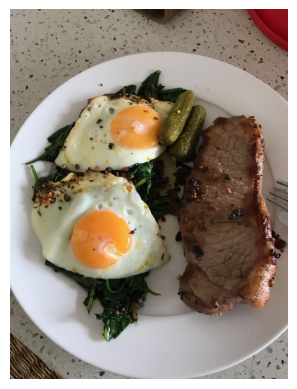

In [48]:
import matplotlib.pyplot as plt
# plot the image
plt.imshow(steak)
plt.axis(False)

In [49]:
# check the shape
steak.shape

(4032, 3024, 3)

> **NOTE:** When you train a neural network, it's important that your new data is formatted the same as the data it was trained on.

In [50]:
# create a function to import an image and resize it to be used with the model
def load_and_prep_image(filename, img_shape=224):
    """
    Reads an image from filename, turns it into a tensor, reshapes it and fixes dimensionality
    """
    # read in the image
    img = tf.io.read_file(filename)
    
    # decode the read file into a tensor
    img = tf.image.decode_image(img)
    
    # resize the image
    img = tf.image.resize(img, [img_shape, img_shape])
    
    # normalize vector values
    img = img / 255.
    
    return img

In [51]:
# load in and preprocess image
steak = load_and_prep_image("../data/images/03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.65049016, 0.6318627 , 0.5897058 ],
        [0.6318627 , 0.6083333 , 0.56127447],
        ...,
        [0.5215686 , 0.05098039, 0.09019607],
        [0.495098  , 0.04215686, 0.07058823],
        [0.52843136, 0.07745098, 0.10490195]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.63872546, 0.6230392 , 0.57598037],
        [0.6558823 , 0.6323529 , 0.58529407],
        ...,
        [0.53529406, 0.06862745, 0.09215686],
        [0.5299019 , 0.05931372, 0.09460784],
        [0.51421565, 0.05539215, 0.0867647 ]],

       [[0.65196073, 0.63627446, 0.58921564],
        [0.63921565, 0.6137254 , 0.56764704],
        [0.6563725 , 0.62696075, 0.5828431 ],
        ...,
        [0.53137255, 0.06470588, 0.08039215],
        [0.5274509 , 0.06862745, 0.09999999],
        [0.522549  , 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745095, 0.3102941 ],
        [0.05

In [52]:
pred_7 = model_7.predict(tf.expand_dims(steak, axis=0))

2023-01-07 12:47:17.537943: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 433ms/step


In [53]:
# remind ourselves of our class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [54]:
# we can index the predicted class by rounding the prediction probability on the class_names
pred_class = class_names[int(tf.round(pred_7))]
pred_class

'steak'

In [55]:
def pred_and_plot(model, filename, class_names=class_names):
    """
    Imports an image located at filename, makes a prediction with model and 
    plots the image with the predicted class as the title.
    """
    # import the target image and preprocess it
    img = load_and_prep_image(filename)
    
    # make a prediction
    pred = model.predict(tf.expand_dims(img, axis=0))
    
    # Get the predicted class
    pred_class = class_names[int(tf.round(pred))]
    
    # plot the image and predicted class
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False)
    

1/1 [==============================] - 0s 15ms/step


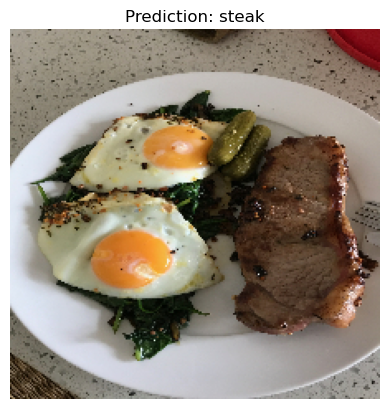

In [56]:
# Test model on custom image
pred_and_plot(model_7, "../data/images/03-steak.jpeg")

1/1 [==============================] - 0s 15ms/step


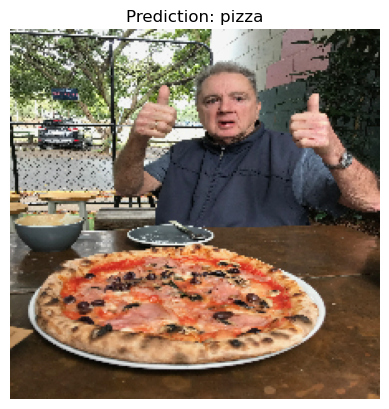

In [57]:
# download another image and test
pred_and_plot(model_7, "../data/images/03-pizza-dad.jpeg")

# Multi-Class Image Classification

Switching from binary classification to a 10-class multi-class classification model

1. Become one with the data
2. Preprocess the data, get ready for the model
3. Create a model, start with baseline
4. Fit the model (overfit to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model
7. Repeat until satisfied

## 1. Become one with the model

In [58]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip -P ../data/
    
# Unzip the downloaded file
zip_ref = zipfile.ZipFile("../data/10_food_classes_all_data.zip")
zip_ref.extractall()
zip_ref.close()


--2023-01-07 12:47:18--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.45.80, 142.251.40.80, 142.250.138.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.45.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘../data/10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M   107MB/s    in 4.8s    

2023-01-07 12:47:23 (104 MB/s) - ‘../data/10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [59]:
import os

# walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("../data/10_food_classes_all_data"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '../data/10_food_classes_all_data'.
There are 10 directories and 0 images in '../data/10_food_classes_all_data/test'.
There are 0 directories and 250 images in '../data/10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '../data/10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '../data/10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '../data/10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '../data/10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '../data/10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '../data/10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '../data/10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '../data/10_food_classes_all_data/test/steak'.
The

In [60]:
# Setup the train and test directories
train_dir = "../data/10_food_classes_all_data/train/"
test_dir = "../data/10_food_classes_all_data/test/"

In [61]:
# let's get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names=np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['811798.jpg']
Image shape: (512, 512, 3)


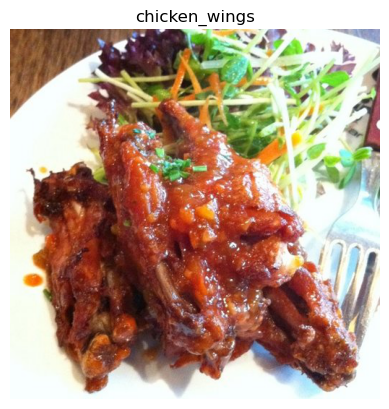

In [62]:
# visualize
import random
img = view_random_image(target_dir=train_dir,
                       target_class=random.choice(class_names))

### 2. Preprocess the data (prepare it for the model)

In [63]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# load data from dir and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode="categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a model (start with a baseline)

CNN Explainer Website... let's take their model and use it for our problem

In [64]:
# seed
tf.random.set_seed(42)

# build the model
model_8 = Sequential([
    Conv2D(10, 3, input_shape=(224,224,3)),
    Activation('relu'),
    Conv2D(10, 3),
    MaxPool2D(),
    Conv2D(10,3),
    Activation('relu'),
    Conv2D(10,3),
    MaxPool2D(),
    Conv2D(10,3),
    Activation('relu'),
    Conv2D(10,3),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax"), # 10 output neurons to match the class, softmax optimal for multi-class
])

# compile model
model_8.compile(loss=CategoricalCrossentropy(),
               optimizer=Adam(),
               metrics=["accuracy"])

## 4. Fit the model

In [65]:
# fit the model
history_8 = model_8.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=test_data,
                       validation_steps=len(test_data)) # 0.25 * len(test_data) can provide extra speed for initial tests

Epoch 1/5


2023-01-07 12:47:28.203328: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-07 12:47:28.274770: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-07 12:47:28.274819: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 83006 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


235/235 [==============================] - ETA: 0s - loss: 2.1190 - accuracy: 0.2243

2023-01-07 12:47:51.204092: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-07 12:47:51.235224: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-07 12:47:51.235271: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 83006 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


235/235 [==============================] - 31s 125ms/step - loss: 2.1190 - accuracy: 0.2243 - val_loss: 1.9591 - val_accuracy: 0.3008
Epoch 2/5
235/235 [==============================] - 27s 113ms/step - loss: 1.9015 - accuracy: 0.3399 - val_loss: 1.7943 - val_accuracy: 0.3656
Epoch 3/5
235/235 [==============================] - 27s 113ms/step - loss: 1.7572 - accuracy: 0.4035 - val_loss: 1.7695 - val_accuracy: 0.3812
Epoch 4/5
235/235 [==============================] - 26s 112ms/step - loss: 1.6320 - accuracy: 0.4483 - val_loss: 1.8010 - val_accuracy: 0.3688
Epoch 5/5
235/235 [==============================] - 27s 114ms/step - loss: 1.4745 - accuracy: 0.5009 - val_loss: 1.8946 - val_accuracy: 0.3544


## 5. Evaluate the model

In [66]:
# evaluate the model
model_8.evaluate(test_data)

79/79 [==============================] - 7s 86ms/step - loss: 1.8946 - accuracy: 0.3544


[1.8945858478546143, 0.35440000891685486]

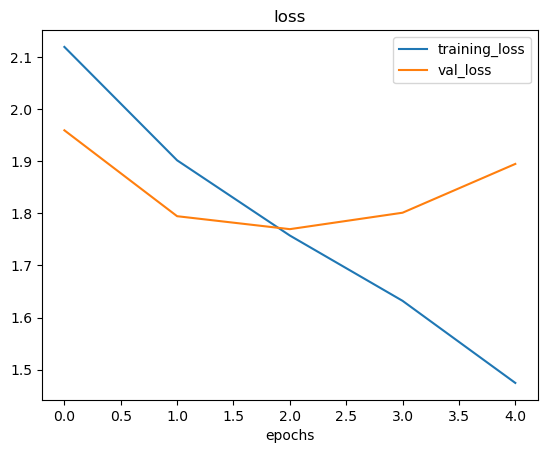

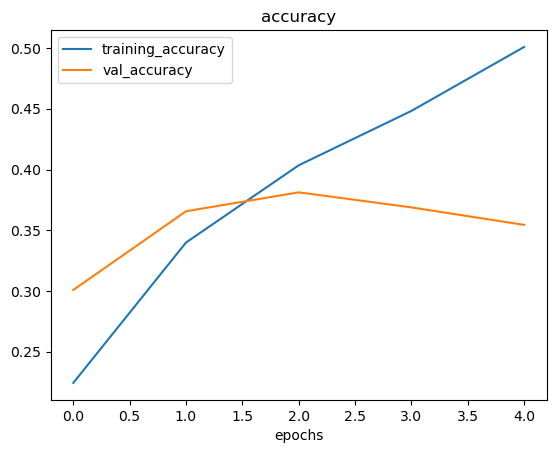

In [67]:
# Check the models loss curves
plot_loss_curves(history_8)

What do these loss curves tell us?

Massive overfitting!

### 6. Adjust model hyperparameters to beat baseline, reducing overfitting

Due to it's performance on the tranining, the model is learning something. However, it is not generalizing.

Let's prevent overfitting by:
* **GET MORE DATA**
* **Simplify the model** - overcomplicated models learn the training data too well
* **Use data augmentation** - manipulates the pictures to introduce common happenstance/diversity, for instance changing the angle of the picture
* **Use Transfer Learning** - Leverages patterns another model has learned to improve results

In [68]:
model_8.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 activation (Activation)     (None, 222, 222, 10)      0         
                                                                 
 conv2d_17 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 activation_1 (Activation)   (None, 108, 108, 10)      0         
                                                      

In [69]:
# Let's try to remove 2 convolutional layers to simplify the model
model_9 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

# compile the model
model_9.compile(loss=CategoricalCrossentropy(),
               optimizer=Adam(),
               metrics=["accuracy"])

# fit the model
history_9 = model_9.fit(train_data,
           epochs=5,
           steps_per_epoch=len(train_data),
           validation_data=test_data,
           validation_steps=len(test_data))

Epoch 1/5
  1/235 [..............................] - ETA: 1:23 - loss: 2.2852 - accuracy: 0.1250

2023-01-07 12:49:52.204995: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-07 12:49:52.251756: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-07 12:49:52.251804: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 83006 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


235/235 [==============================] - ETA: 0s - loss: 2.1288 - accuracy: 0.2452

2023-01-07 12:50:12.895903: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-07 12:50:12.920278: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-07 12:50:12.920326: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 83006 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


235/235 [==============================] - 27s 116ms/step - loss: 2.1288 - accuracy: 0.2452 - val_loss: 1.9283 - val_accuracy: 0.3136
Epoch 2/5
235/235 [==============================] - 27s 114ms/step - loss: 1.7982 - accuracy: 0.3843 - val_loss: 1.9778 - val_accuracy: 0.3180
Epoch 3/5
235/235 [==============================] - 27s 113ms/step - loss: 1.5007 - accuracy: 0.4992 - val_loss: 1.9253 - val_accuracy: 0.3408
Epoch 4/5
235/235 [==============================] - 26s 112ms/step - loss: 1.0454 - accuracy: 0.6688 - val_loss: 2.1891 - val_accuracy: 0.3160
Epoch 5/5
235/235 [==============================] - 27s 113ms/step - loss: 0.6134 - accuracy: 0.8228 - val_loss: 2.6187 - val_accuracy: 0.2972


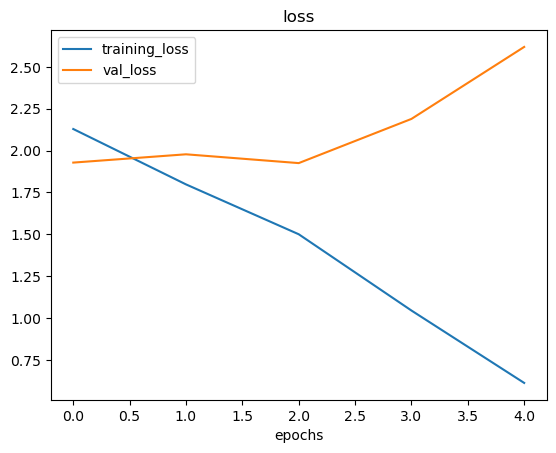

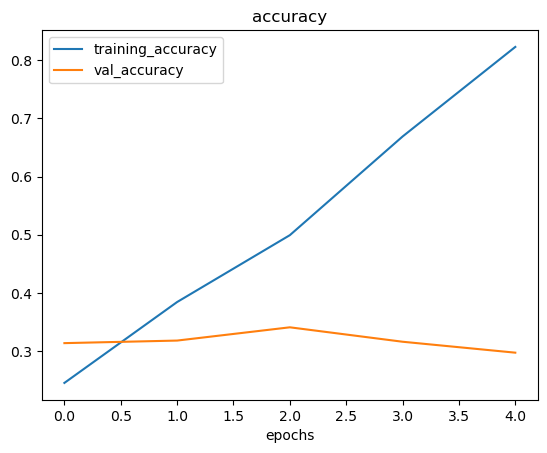

In [70]:
# check out loss curves
plot_loss_curves(history_9)

In [71]:
model_9.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 29160)             0         
                                                                 
 dense_13 (Dense)            (None, 10)               

### Trying to reduce overfitting with data augmentation

Use augmented training data to improve our results.
* Reduce overfitting
* Improve validation accuracy

In [72]:
# Create an augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1./255,
                                            rotation_range=0.2,
                                            width_shift_range=0.2,
                                            height_shift_range=0.2,
                                            zoom_range=0.2,
                                            horizontal_flip=True)


train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224,224),
                                                                  batch_size=32,
                                                                  class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [73]:
# Create another model and train on augmented data
model_10 = tf.keras.models.clone_model(model_8)

# compile cloned model
model_10.compile(loss=CategoricalCrossentropy(),
                 optimizer=Adam(),
                 metrics=["accuracy"])

# fit the cloned model
history_10 = model_10.fit(train_data_augmented,
                         epochs=5,
                         steps_per_epoch=len(train_data_augmented),
                         validation_data=test_data,
                         validation_steps=len(test_data))

Epoch 1/5


2023-01-07 12:52:07.347085: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-07 12:52:07.419164: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-07 12:52:07.419214: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 83006 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


235/235 [==============================] - ETA: 0s - loss: 2.1843 - accuracy: 0.1964

2023-01-07 12:53:07.700268: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-07 12:53:07.731606: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-07 12:53:07.731650: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 83006 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


235/235 [==============================] - 67s 284ms/step - loss: 2.1843 - accuracy: 0.1964 - val_loss: 2.0980 - val_accuracy: 0.2388
Epoch 2/5
235/235 [==============================] - 66s 283ms/step - loss: 2.0593 - accuracy: 0.2691 - val_loss: 1.9048 - val_accuracy: 0.3284
Epoch 3/5
235/235 [==============================] - 67s 284ms/step - loss: 1.9884 - accuracy: 0.2963 - val_loss: 1.8552 - val_accuracy: 0.3568
Epoch 4/5
235/235 [==============================] - 67s 284ms/step - loss: 1.9167 - accuracy: 0.3336 - val_loss: 1.8538 - val_accuracy: 0.3520
Epoch 5/5
235/235 [==============================] - 67s 286ms/step - loss: 1.8896 - accuracy: 0.3431 - val_loss: 1.8104 - val_accuracy: 0.3952


In [74]:
model_8.evaluate(test_data)

79/79 [==============================] - 7s 85ms/step - loss: 1.8946 - accuracy: 0.3544


[1.8945854902267456, 0.35440000891685486]

In [75]:
model_10.evaluate(test_data)

79/79 [==============================] - 7s 86ms/step - loss: 1.8104 - accuracy: 0.3952


[1.8103866577148438, 0.3952000141143799]

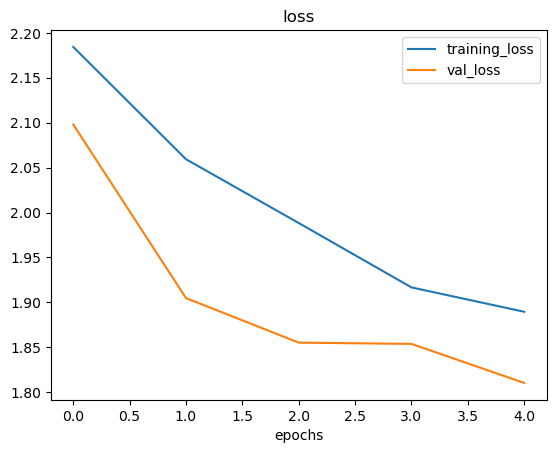

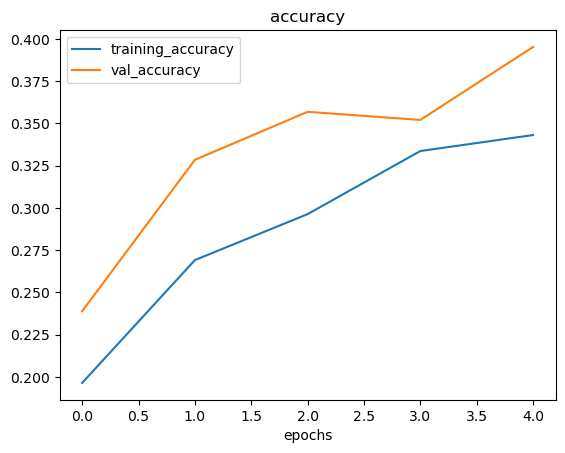

In [76]:
plot_loss_curves(history_10)

### 7. Repeat until satisfied

1. Restructure models architecture - layers, neurons or filters
2. Adjust learning rate
3. Different methods of augmentation - modify the hyperparameters for the augmentation
4. Training for longer - more epochs
5. Transfer learning - Using a previously trained model to enhance it's ability to learn on our data


### Make a prediction with our trained model

Let's use our trained model to make predictions on our own custom images.

In [77]:
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-hamburger.jpeg -P ../data/images/
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-pizza-dad.jpeg -P ../data/images/
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg -P ../data/images/
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-sushi.jpeg -P ../data/images/

--2023-01-07 18:12:49--  https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-hamburger.jpeg
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘../data/images/03-hamburger.jpeg’

03-hamburger.jpeg       [ <=>                ] 138.80K   921KB/s    in 0.2s    

2023-01-07 18:12:49 (921 KB/s) - ‘../data/images/03-hamburger.jpeg’ saved [142130]

--2023-01-07 18:12:50--  https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-pizza-dad.jpeg
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘../data/images/03-pizza-dad.jpeg.3’

03-pizza-dad.jpeg.3     [   <=>              ] 138.80K   303KB/s    in 0.5s    

2023-01-07 18:12:50 (303 KB/s) -

In [87]:
# reconfig pred_and_plot function to work with multi-class images
def pred_and_plot(model, filename, class_names=class_names):
    """
    Imports an image located at filename, makes a prediction with model and 
    plots the image with the predicted class as the title.
    """
    # import the target image and preprocess it
    img = load_and_prep_image(filename)
    
    # make a prediction
    pred = model.predict(tf.expand_dims(img, axis=0))
    
    # Add in logic for multi-class
    if len(pred[0]) > 1:
        pred_class = class_names[tf.argmax(pred[0])]
    else:
        # Get the predicted class
        pred_class = class_names[int(tf.round(pred[0]))]
    
    # plot the image and predicted class
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False)

2023-01-07 18:21:15.037069: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 308ms/step


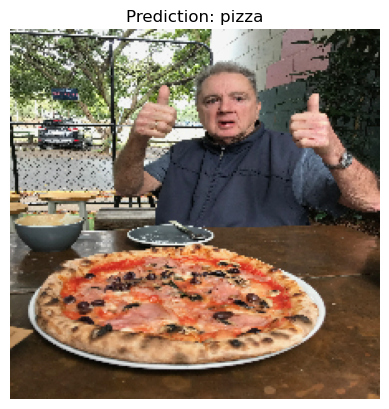

In [91]:
# Make a prediction using model_10
pred_and_plot(model=model_10,
             filename="../data/images/03-pizza-dad.jpeg",
             class_names=class_names)

1/1 [==============================] - 0s 15ms/step


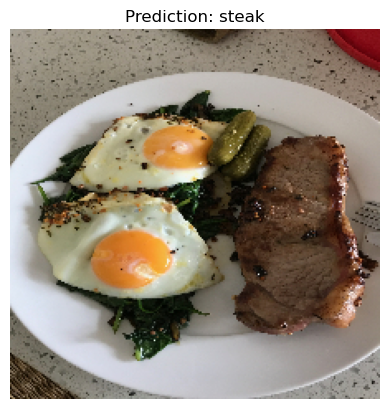

In [95]:
# Make a prediction using model_10
pred_and_plot(model=model_10,
             filename="../data/images/03-steak.jpeg",
             class_names=class_names)

### Save and load our model

In [96]:
# Save a model
model_10.save("../models/saved_trained_model_10")

INFO:tensorflow:Assets written to: ../models/saved_trained_model_10/assets


INFO:tensorflow:Assets written to: ../models/saved_trained_model_10/assets


In [100]:
# load in a trained model and evaluate it
loaded_model_10 = tf.keras.models.load_model("../models/saved_trained_model_10")
loaded_model_10.evaluate(test_data)

 1/79 [..............................] - ETA: 19s - loss: 1.7476 - accuracy: 0.3750

2023-01-07 18:27:35.143282: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-07 18:27:35.174084: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-07 18:27:35.174130: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 83006 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


79/79 [==============================] - 7s 83ms/step - loss: 1.8104 - accuracy: 0.3952


[1.8103864192962646, 0.3952000141143799]

In [101]:
# compare existing to loaded
model_10.evaluate(test_data)

79/79 [==============================] - 7s 84ms/step - loss: 1.8104 - accuracy: 0.3952


[1.8103861808776855, 0.3952000141143799]